Total number of restaurants :  16291
Total number of restaurants at UW:  16291
2    8775
1    3887
3    3629
Name: MINIMUM_INSPECTIONS_PERYEAR, dtype: int64


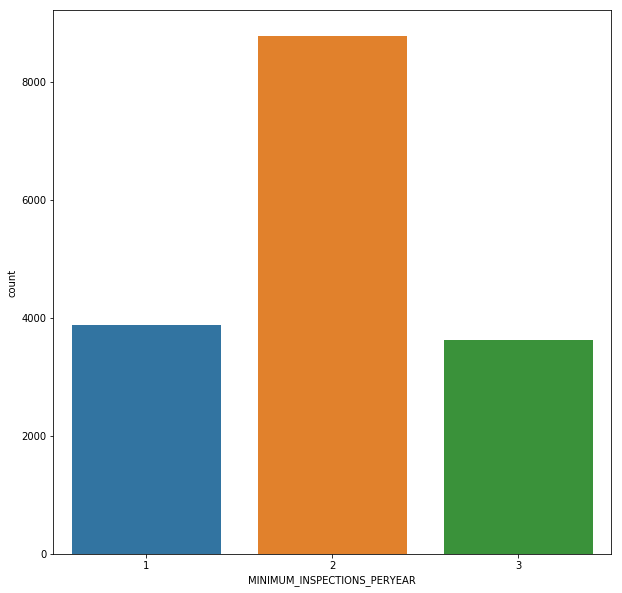

In [5]:
#plot of how many inspections restaurants get per year
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

restaurantData = pd.read_excel('dinesafedata.xlsx')

print("Total number of restaurants : ", len(restaurantData))
#getting rows of only academicians
inspectionData = restaurantData[restaurantData.MINIMUM_INSPECTIONS_PERYEAR.isin(['1','2', '3', '4'])]

print("Total number of restaurants at UW: ", len(inspectionData))

count = restaurantData.MINIMUM_INSPECTIONS_PERYEAR.value_counts()
labels = count.index.values
values = count.values
print(count)

#BAR CHART
plt.figure(figsize=(10,10))
sns.countplot(inspectionData.MINIMUM_INSPECTIONS_PERYEAR, data=inspectionData)
plt.savefig('barchart.png')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

restaurantData = pd.read_excel('dinesafedata.xlsx')
fullRestaurantData = pd.read_excel('fulldinesafedata.xlsx')

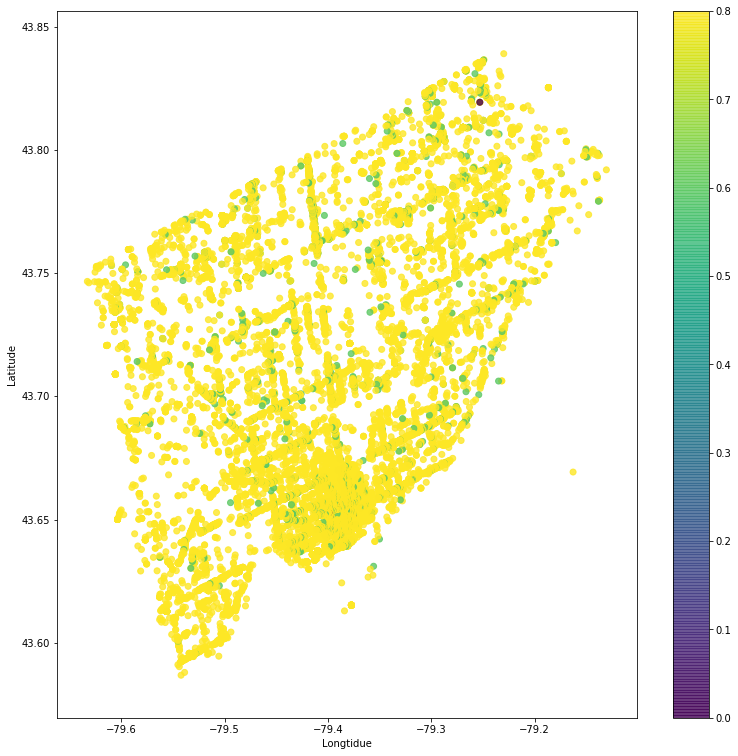

In [94]:
#plot of places that have the different establishment statuses
colors = np.full((len(restaurantData)), 0.00)
for k in range(0, len(restaurantData)):
    if restaurantData.ESTABLISHMENT_STATUS[k] == 'Closed':
        colors[k] = 0.0
    if restaurantData.ESTABLISHMENT_STATUS[k] == 'Conditional Pass':
        colors[k] = 0.6
    if restaurantData.ESTABLISHMENT_STATUS[k] == 'Pass':
        colors[k] = 0.8
        

plt.figure(figsize=(13,13))
plt.scatter(restaurantData.LONGITUDE, restaurantData.LATITUDE,alpha=0.8, c = colors)

plt.xlabel("Longtidue")
plt.ylabel("Latitude")
plt.colorbar();
plt.show()


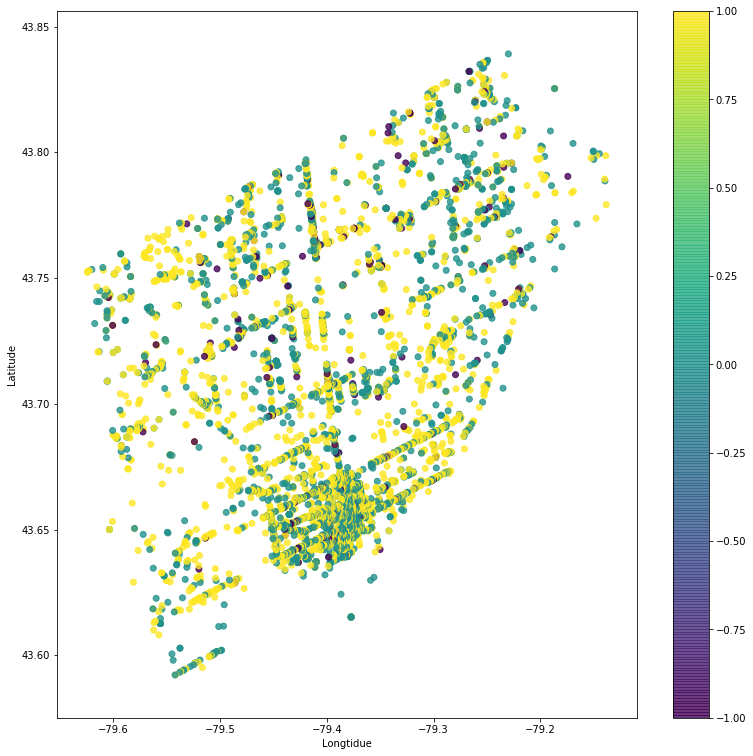

In [96]:
#plot of places that have severity levels(meaning they didn't get a clean pass)

severity = restaurantData[restaurantData.SEVERITY.isin(['M - Minor','S - Significant', 'C - Crucial', '4'])]

colors2 = np.full((len(severity)), 0)
#print (severity.SEVERITY)
i = 0
for k in severity.SEVERITY:
    if k == 'M - Minor':
        colors2[i] = 1
        #print("changed1")
    if k == 'S - Significant':
        colors2[i] = 0
        #print("changed3")
    if k == 'C - Crucial':
        colors2[i] = -1
        #print("changed2")
        
    i = i + 1
        

plt.figure(figsize=(13,13))
plt.scatter(severity.LONGITUDE, severity.LATITUDE,alpha=0.8, c = colors2)

plt.xlabel("Longtidue")
plt.ylabel("Latitude")
plt.colorbar();
plt.show()

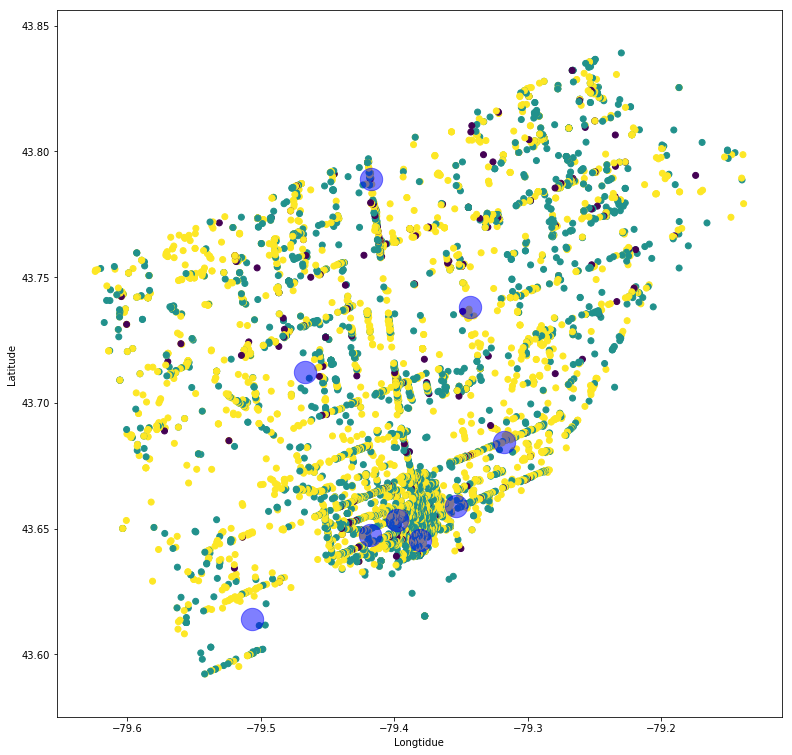

In [116]:
#plot of severity levels with tobacco seller locations
tabaccoData = pd.read_excel('tabacco seller location.xlsx')



plt.figure(figsize=(13,13))
plt.scatter(severity.LONGITUDE, severity.LATITUDE,alpha=1, c = colors2)

plt.scatter(tabaccoData.Longitude, tabaccoData.Latitude,alpha=0.5, color = 'b', s = 500)
plt.xlabel("Longtidue")
plt.ylabel("Latitude")
plt.show()

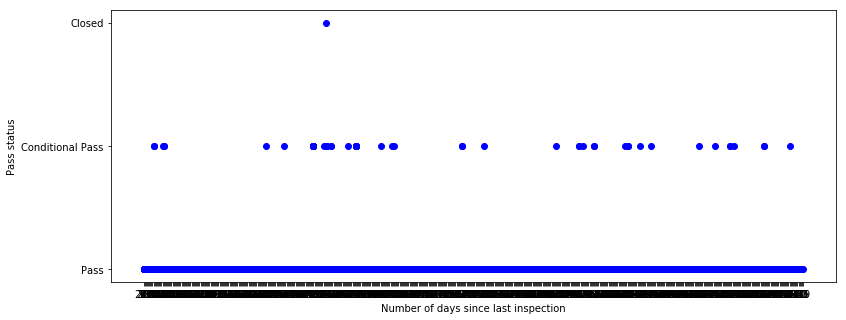

<Figure size 432x288 with 0 Axes>

In [310]:
from datetime import datetime
date_format = "%Y/%m/%d"
def dateConverter(date):
    list1 = list(date)
    for i in range(0, len(list1)):
        if list1[i] == '-':
            list1[i] = '/'
    
    str1 = ''.join(list1)
    return str1

numDays = np.array((1,2))

i = 0
for n in range(0, len(fullRestaurantData)):
    if fullRestaurantData.ESTABLISHMENT_NAME[i] == fullRestaurantData.ESTABLISHMENT_NAME[i+1]:#means theres multiple values
        #compare the dates to find the difference
        date1 = datetime.strptime(dateConverter(fullRestaurantData.INSPECTION_DATE[i]), date_format)
        date2 = datetime.strptime(dateConverter(fullRestaurantData.INSPECTION_DATE[i+1]), date_format)
        dateDiff = date2 - date1
        
        if dateDiff.days != 0: #inspected on the same day, we dont want this
            #store the date and status into the array
            numDays = np.vstack([numDays,[dateDiff.days,fullRestaurantData.ESTABLISHMENT_STATUS[i]]])

        #iterate until next restaurant to not produce same results
        j = i
        for m in range(0, len(fullRestaurantData)):
            if fullRestaurantData.ESTABLISHMENT_NAME[i] != fullRestaurantData.ESTABLISHMENT_NAME[j]:#iterate until it is not the same restarant
                break
            j = j + 1
            
        
        i = j
    else:#inc i
        i = i+1
        
        
    if i > 90000:#if its gone to "eof"
        break;
        
#numDays = np.delete(numDays, 0)
x = [ x[0] for x in numDays]
y = [ x[1] for x in numDays]
x.pop(0)
y.pop(0)

#print(x)
#print(numDays)
plt.figure(figsize=(13,5))
plt.scatter(x,y,alpha=1, color = 'b')

plt.xlabel("Number of days since last inspection")
plt.ylabel("Pass status")
plt.show()
plt.savefig('NumDaySinceLastInspection.png')

In [4]:
weatherData = pd.read_excel('Weatherforecast.xlsx')

<Figure size 936x360 with 0 Axes>

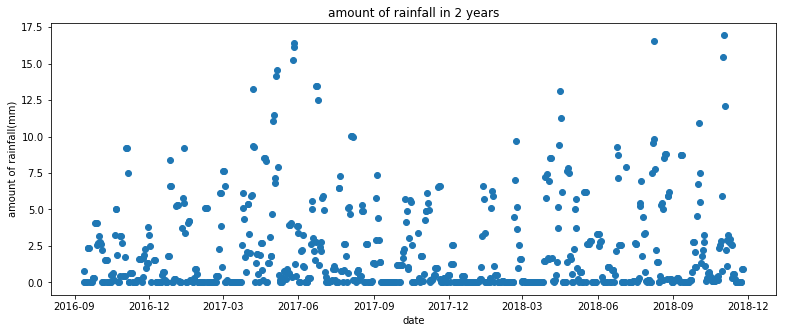

In [223]:
import matplotlib.pyplot as plt
from matplotlib.dates import (MONTHLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

days = np.full((1,1),0)
date = ''
#start from 2 as we are getting the past 2 days of rain + current day to get a 3 day rain forecast
for k in range(2, len(weatherData)):
    avgrain = (weatherData.totalrain[k] + weatherData.totalrain[k-1] + weatherData.totalrain[k-2])/3
    #date = '' + str(weatherData.year[k]) + '-' + str(weatherData.month[k]) + '-' + str(weatherData.day[k])
    days = np.vstack([days,[avgrain]])
    #days = np.vstack([days,[avgrain,date]])


#remove the first element of 0,0
days = np.delete(days, 0, 0)
plt.figure(figsize=(13,5))
#plt.scatter(days[1],days[0],alpha=1, color = 'b')

rule = rrulewrapper(MONTHLY, interval=3)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%y')
date1 = datetime.date(2016, 9, 12)
date2 = datetime.date(2018, 11, 26)
delta = datetime.timedelta(days=1)

dates = drange(date1, date2, delta)

#fig, ax = plt.subplots()
plt.figure(figsize=(13,5))
plt.plot_date(dates, days)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)


plt.title("amount of rainfall in 2 years")
plt.xlabel("date")
plt.ylabel("amount of rainfall(mm)")
plt.show()

In [184]:
import matplotlib.pyplot as plt
from matplotlib.dates import (MONTHLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime
import math

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

def findRainLevel(days,date):
    
    #find the corresponding date, then return the avg rain
    for i in range(0, len(days)):
        if days[i][1] == date:
            if(days[i][0] == 'nan'):
                return 0.0
            return days[i][0]
    
    return 0.0

days = np.full((1,2),0)
date = ''

rainforcrucial = np.full((1,1),0)
rainforsignificant = np.full((1,1),0)
rainforminor = np.full((1,1),0)

#start from 2 as we are getting the past 2 days of rain + current day to get a 3 day rain forecast
for k in range(2, len(weatherData)):
    avgrain = (weatherData.totalrain[k] + weatherData.totalrain[k-1] + weatherData.totalrain[k-2])/3
    date = '' + str(weatherData.year[k]) + '-' + str(weatherData.month[k]) + '-' + str(weatherData.day[k])
    days = np.vstack([days,[avgrain,date]])

#get the corresponding rain level for the severity
for k in range(0, len(restaurantData)):
    if restaurantData.SEVERITY[k] == 'M - Minor':
        rainforminor = np.vstack([rainforminor,[findRainLevel(days,restaurantData.INSPECTION_DATE[k])]])
    elif restaurantData.SEVERITY[k] == 'S - Significant':
        rainforsignificant = np.vstack([rainforsignificant,[findRainLevel(days,restaurantData.INSPECTION_DATE[k])]])
    elif restaurantData.SEVERITY[k] == 'C - Crucial':
        rainforcrucial = np.vstack([rainforcrucial,[findRainLevel(days,restaurantData.INSPECTION_DATE[k])]])
  

    #remove the first element of 0,0
rainforminor = np.delete(rainforminor, 0, 0)
rainforsignificant = np.delete(rainforsignificant, 0, 0)
rainforcrucial = np.delete(rainforcrucial, 0, 0)

Text(0,0.5,'percentage crucial cases')

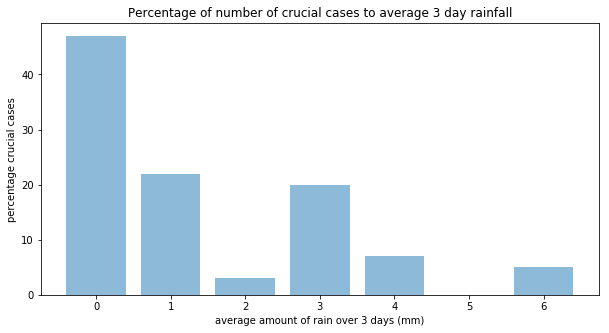

In [225]:
crucialy = [ x[0] for x in rainforcrucial]

crucialy = [float(x) for x in crucialy]

#remove all the zeros from list
crucialy = remove_values_from_list(crucialy, 0)

#round the values up
for i in range(len(crucialy)):
    crucialy[i] = math.ceil(crucialy[i])

#create an empty array
normalisedcrucial = [0] * max(crucialy)

#find the number of items for each value
for i in range(len(crucialy)):
    normalisedcrucial[crucialy[i]-1] += 1

#now find the percentage of the value compared to a whole
for i in range(len(normalisedcrucial)):
    normalisedcrucial[i] = (normalisedcrucial[i]/len(crucialy)) * 100

#round the values up
for i in range(len(normalisedcrucial)):
    normalisedcrucial[i] = math.ceil(normalisedcrucial[i])
    

#fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

 
plt.bar(range(0, max(crucialy)), normalisedcrucial, align='center', alpha=0.5)

plt.title("Percentage of number of crucial cases to average 3 day rainfall")
plt.xlabel("average amount of rain over 3 days (mm)")
plt.ylabel("percentage crucial cases")


Text(0,0.5,'number of significant cases')

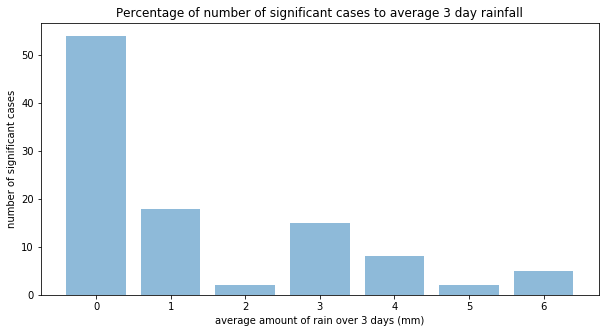

In [224]:
significanty = [ x[0] for x in rainforsignificant]

significanty = [float(x) for x in significanty]

#remove all the zeros from list
significanty = remove_values_from_list(significanty, 0)


#round the values up
for i in range(len(significanty)):
    significanty[i] = math.ceil(significanty[i])

      
#create an empty array
normalisedsignificant = [0] * max(significanty)

#find the number of items for each value
for i in range(len(significanty)):
    normalisedsignificant[significanty[i]-1] += 1

#now find the percentage of the value compared to a whole
for i in range(len(normalisedsignificant)):
    normalisedsignificant[i] = (normalisedsignificant[i]/len(significanty)) * 100

#round the values up
for i in range(len(normalisedsignificant)):
    normalisedsignificant[i] = math.ceil(normalisedsignificant[i])
    

#fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

 
plt.bar(range(0, max(significanty)), normalisedsignificant, align='center', alpha=0.5)

plt.title("Percentage of number of significant cases to average 3 day rainfall")
plt.xlabel("average amount of rain over 3 days (mm)")
plt.ylabel("number of significant cases")


Text(0,0.5,'number of minor cases')

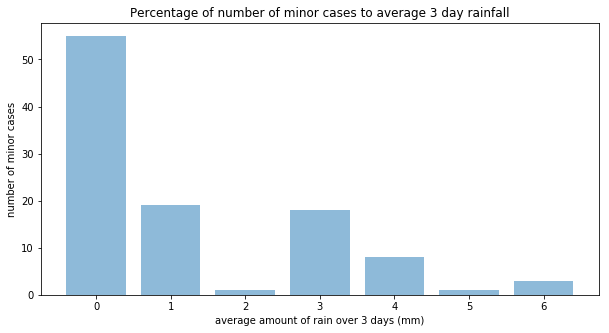

In [226]:
minory = [ x[0] for x in rainforminor]

minory = [float(x) for x in minory]

#remove all the zeros from list
minory = remove_values_from_list(minory, 0)


#round the values up
for i in range(len(minory)):
    minory[i] = math.ceil(minory[i])

      
#create an empty array
normalisedminor = [0] * max(minory)

#find the number of items for each value
for i in range(len(minory)):
    normalisedminor[minory[i]-1] += 1

#now find the percentage of the value compared to a whole
for i in range(len(normalisedminor)):
    normalisedminor[i] = (normalisedminor[i]/len(minory)) * 100

#round the values up
for i in range(len(normalisedminor)):
    normalisedminor[i] = math.ceil(normalisedminor[i])
    

#fig, ax = plt.subplots()
plt.figure(figsize=(10,5))

 
plt.bar(range(0, max(minory)), normalisedminor, align='center', alpha=0.5)

plt.title("Percentage of number of minor cases to average 3 day rainfall")
plt.xlabel("average amount of rain over 3 days (mm)")
plt.ylabel("number of minor cases")

In [ ]:
#old code that doesnt normalise the values

minory = [ x[0] for x in rainforminor]

minory = [float(x) for x in minory]

#remove all the zeros from list
minory = remove_values_from_list(minory, 0)


#round the values up
for i in range(len(minory)):
    minory[i] = math.ceil(minory[i])

      
#fig, ax = plt.subplots()
plt.figure(figsize=(13,5))

sns.countplot(minory)

plt.xlabel("average amount of rain over 3 days (mm)")
plt.ylabel("number of minor cases")

In [268]:
import matplotlib.pyplot as plt
from matplotlib.dates import (MONTHLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime
import math

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

def findRainLevel(amountOfRainOnDates,date):
    
    #find the corresponding date, then return the avg rain
    for i in range(0, len(amountOfRainOnDates)):
        if amountOfRainOnDates[i][1] == date:
            if(amountOfRainOnDates[i][0] == 'nan'):
                return "0.0"
            
            #for fomatting
            elif(amountOfRainOnDates[i][0] == "0"):
                return "0.0"
            #print("comes here, returning ", amountOfRainOnDates[i][0], " i os ", i, " for date ", date , " and arraydate" , amountOfRainOnDates[i][1])
            return amountOfRainOnDates[i][0]
    
    return "0.0"

amountOfRainOnDates = np.full((1,2),0)
date = ''


#get the rainfall for the particular day, and convert the date data into something we can compare
for k in range(0, len(weatherData)):
    amountofrain = float(weatherData.totalrain[k])
    date = '' + str(weatherData.year[k]) + '-' + str(weatherData.month[k]) + '-' + str(weatherData.day[k])
    amountOfRainOnDates = np.vstack([amountOfRainOnDates,[amountofrain,date]])


#create the list for the amountofrain for the particular inspection day
listofrain = [None] * len(restaurantData)

#populate the list
for k in range(0, len(restaurantData)):
    listofrain[k] = findRainLevel(amountOfRainOnDates, restaurantData.INSPECTION_DATE[k])
    
#add the list to the data
restaurantData['RAIN_LEVEL'] = pd.Series(listofrain)

In [275]:
tabaccoData = pd.read_excel('tabacco seller location.xlsx')

def findTabaccoSeller(tabaccoData, long, lat):
    
    #go thru the list of tabacco seller and see if the given long and lat is in the list
    for i in range(0, len(tabaccoData)):
        if tabaccoData.Longitude[i] == long and tabaccoData.Latitude[i] == lat:
            return "True"
    return "False"

#create the list for the true or false if the restaurant selss tobacco
listoftobacco = [None] * len(restaurantData)

#populate the list
for k in range(0, len(restaurantData)):
    listoftobacco[k] = findTabaccoSeller(tabaccoData,restaurantData.LONGITUDE[k],restaurantData.LATITUDE[k])

#add the list to the data
restaurantData['SELL_TOBACCO'] = pd.Series(listoftobacco)

In [305]:
fullRestaurantData = pd.read_excel('fulldinesafedata.xlsx')

In [318]:
#create the list for the number of past infractions for each restaurant
ListOfEstablishmentIdWithInfractions = np.full((1,2),0)
listofinfractions = [None] * len(restaurantData)

numInfractions = 0
i = 0
for n in range(0, len(fullRestaurantData)):
    if fullRestaurantData.ESTABLISHMENT_NAME[i] == fullRestaurantData.ESTABLISHMENT_NAME[i+1] and fullRestaurantData.ESTABLISHMENT_ADDRESS[i] == fullRestaurantData.ESTABLISHMENT_ADDRESS[i+1]:#means theres multiple values
        
        #iterate until next restaurant and count the number of infractions on the way
        j = i
        for m in range(0, len(fullRestaurantData)):
            if fullRestaurantData.SEVERITY[j] == 'M - Minor' or fullRestaurantData.SEVERITY[j] == 'S - Significant' or fullRestaurantData.SEVERITY[j] == 'C - Crucial':
                #print(fullRestaurantData.ROW_ID[j], fullRestaurantData.ESTABLISHMENT_ADDRESS[j])
                numInfractions += 1
        
            if fullRestaurantData.ESTABLISHMENT_NAME[i] != fullRestaurantData.ESTABLISHMENT_NAME[j] or fullRestaurantData.ESTABLISHMENT_ADDRESS[i] != fullRestaurantData.ESTABLISHMENT_ADDRESS[j]:#iterate until it is not the same address(means different restauratn/outlet)
                #add it to the list
                ListOfEstablishmentIdWithInfractions = np.vstack([ListOfEstablishmentIdWithInfractions,[fullRestaurantData.ESTABLISHMENT_ID[i],numInfractions]])
                
                #reset the counter to 0 for the next restaurant
                numInfractions = 0
                break
            #print(fullRestaurantData.ROW_ID[j], fullRestaurantData.ESTABLISHMENT_ADDRESS[j])
            j = j + 1
            
        
        i = j
    else:#inc i
        #print("ASD", fullRestaurantData.ROW_ID[i], fullRestaurantData.ESTABLISHMENT_ADDRESS[i])
        #this cases only have 1 store
        if fullRestaurantData.SEVERITY[i] == 'M - Minor' or fullRestaurantData.SEVERITY[i] == 'S - Significant' or fullRestaurantData.SEVERITY[i] == 'C - Crucial':
            numInfractions += 1
            
        ListOfEstablishmentIdWithInfractions = np.vstack([ListOfEstablishmentIdWithInfractions,[fullRestaurantData.ESTABLISHMENT_ID[i],numInfractions]])
        numInfractions = 0
        i = i+1
        
        
    if i > 90000:#if its gone to "eof"
        break;
        
print(ListOfEstablishmentIdWithInfractions)


[[       0        0]
 [ 1222579        5]
 [ 1222807        0]
 ...
 [10641015        6]
 [10641106        1]
 [10641129        5]]


In [319]:
def findInfractions(ListOfEstablishmentIdWithInfractions, ESTABLISHMENT_ID):
    
    #go thru the list of infractions and match the infractions with the ID
    for i in range(0, len(ListOfEstablishmentIdWithInfractions)):
        if ListOfEstablishmentIdWithInfractions[i][0] == ESTABLISHMENT_ID:
            return ListOfEstablishmentIdWithInfractions[i][1]
    return 0

#create the list for the true or false if the restaurant selss tobacco
listofinfractions = [None] * len(restaurantData)

#populate the list
for k in range(0, len(restaurantData)):
    listofinfractions[k] = findInfractions(ListOfEstablishmentIdWithInfractions,restaurantData.ESTABLISHMENT_ID[k])

#add the list to the data
restaurantData['NUM_INFRACTIONS'] = pd.Series(listofinfractions)
print(restaurantData)
    

       ROW_ID  ESTABLISHMENT_ID  INSPECTION_ID  \
0       56795          10510660      103903509   
1       25253          10287417      103825616   
2       43570          10440820      103825617   
3       49782          10478328      103888363   
4        1793           9002748      103898918   
5       44641          10448400      104126514   
6       57602          10514119      103843164   
7        7648           9012206      103947831   
8       43468          10439706      103888332   
9       83376          10606138      104034455   
10      28912          10332939      103963764   
11      28330          10326909      103929839   
12      58132          10516063      104123407   
13      57601          10514071      103898933   
14      37124          10397899      103929843   
15      87901          10625314      104171143   
16      16117           9364488      103960141   
17      86171          10617438      104108739   
18      89757          10638477      104256083   


In [320]:
writer = pd.ExcelWriter('output.xlsx')
restaurantData.to_excel(writer,'Sheet1')
writer.save()